# PR-Root: Phase-Resolved Root Arithmetic Demo

**Visualizing the ℤ₂ Holonomy of the Square Root**

This notebook demonstrates how PR-Root tracks phase continuously through branch cuts,
enabling deterministic multi-valued function evaluation. We'll see:

1. **Phase unwrapping**: How θ (the lift) stays continuous while θ_R jumps at cuts
2. **Winding number**: Counting complete rotations around the origin
3. **Branch parity**: The ℤ₂ holonomy that flips √z between sheets
4. **The pump effect**: Why √z changes sign after one loop around the origin

In [12]:
import cmath
import math
import numpy as np
import matplotlib.pyplot as plt

from prroot import PRConfig, PRState
from prroot.operations import pr_sqrt, pr_unwrap_path
from prroot.viz import (
    plot_riemann_surface, plot_theta_evolution, 
    plot_parity_timeline, plot_sqrt_branches, plot_holonomy_demo
)

# Configuration (immutable)
cfg = PRConfig()

# Helper: create circular path
def circular_path(center=0, radius=1.0, n_loops=1, n_points=100):
    t = np.linspace(0, 2 * np.pi * n_loops, n_points + 1)
    return center + radius * np.exp(1j * t)

# Helper: create spiral path
def spiral_path(center=0, r_start=0.5, r_end=1.5, n_loops=2, n_points=200):
    t = np.linspace(0, 2 * np.pi * n_loops, n_points + 1)
    r = np.linspace(r_start, r_end, n_points + 1)
    return center + r * np.exp(1j * t)

# Enable interactive plots in notebook
%matplotlib inline
plt.rcParams['figure.dpi'] = 100
print("PR-Root v1.0.1 loaded successfully!")

PR-Root v1.0.1 loaded successfully!


## 1. The Problem: Standard √ is Ambiguous

In standard complex arithmetic, √(-1) could be +i or -i. Most languages pick one arbitrarily.
But what happens when we *continuously* move from +1 around to -1?

In [13]:
# Standard Python: √(-1) is always the same
print(f"Standard √(-1) = {(-1+0j)**0.5}")
print(f"Standard √(-1) = {(-1+0j)**0.5}")  # Same answer, no history

# But mathematically, √z has TWO values!
# Which one you get should depend on HOW you got to z.

Standard √(-1) = (6.123233995736766e-17+1j)
Standard √(-1) = (6.123233995736766e-17+1j)


## 2. One Loop Around the Origin

Let's track what happens when we go around the origin once.
PR-Root maintains a **continuous lift** of the phase.

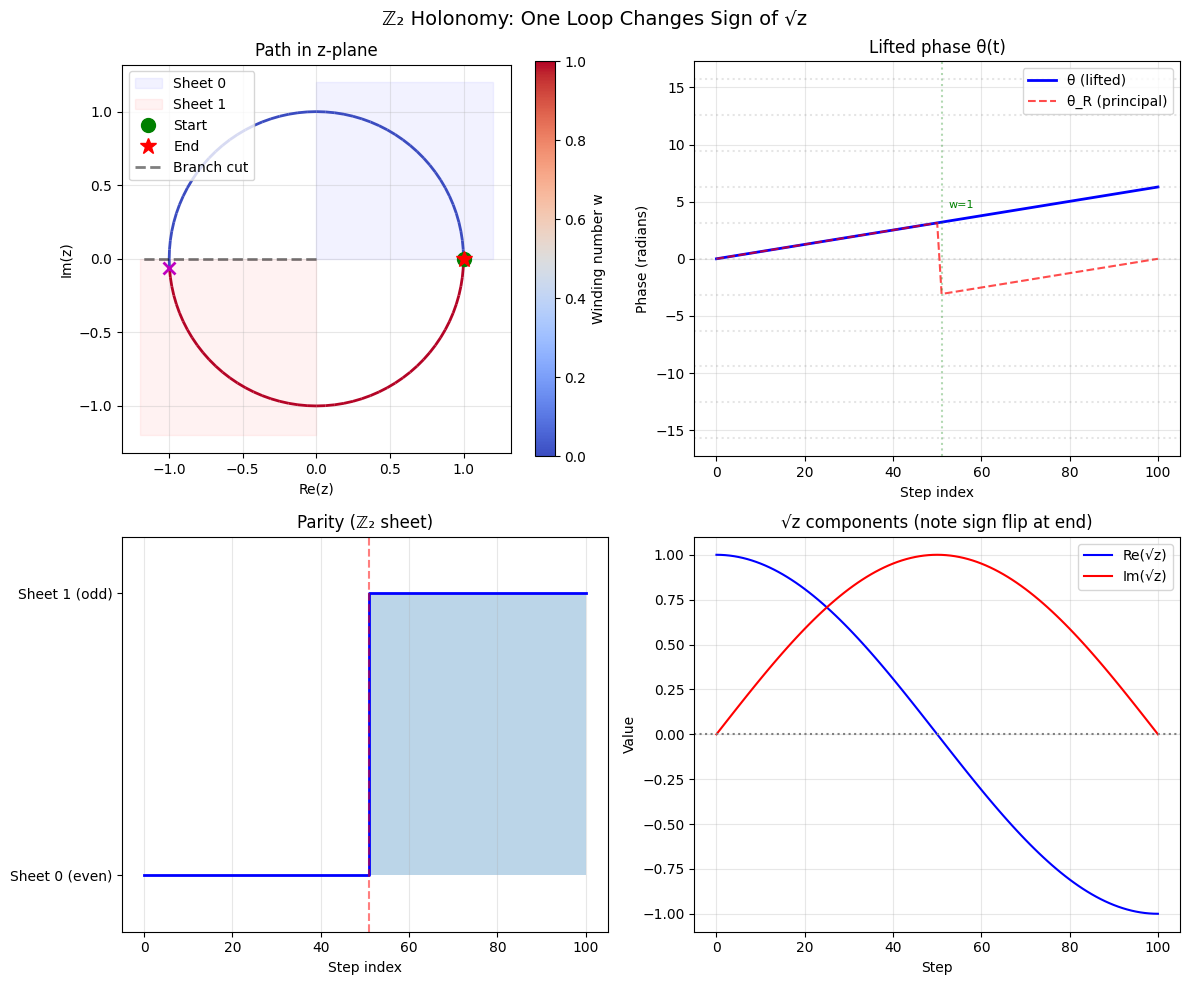

In [14]:
# Create a circular path around the origin
z_path = circular_path(center=0, radius=1.0, n_loops=1, n_points=100)

# Unwrap using PR-Root (maintains continuous phase)
states = pr_unwrap_path(z_path, config=cfg)

# Show the holonomy demo dashboard
fig, axes = plot_holonomy_demo(config=cfg)
plt.tight_layout()
plt.show()

**Key observations:**
- **θ (blue line)** increases continuously from 0 to 2π
- **θ_R (red dots)** jumps at the branch cut (θ = ±π)
- **Winding w** goes from 0 → 1
- **Parity b** flips from 0 → 1

This parity flip is the **ℤ₂ holonomy**: after one loop, √z changes sign!

## 3. The ℤ₂ Pump: √z Changes Sign After One Loop

This is the core insight: starting at z=1 with √z=1, after going around the origin once,
we return to z=1 but now √z = -1!

In [15]:
# Demonstrate the sheet swap
print("=== The ℤ₂ Pump ===\n")

# Start at z = 1
z_start = PRState.from_complex(1 + 0j, config=cfg)
sqrt_start, parity_start = pr_sqrt(z_start)
print(f"Initial: z = {z_start.z:.4f}, θ = {z_start.theta:.4f}")
print(f"         √z = {sqrt_start.z:.4f}, parity = {parity_start}")

# After one loop: still z = 1, but with winding = 1
z_end = states[-1]  # Final state from our circular path
sqrt_end, parity_end = pr_sqrt(z_end)
print(f"\nAfter 1 loop: z = {z_end.z:.4f}, θ = {z_end.theta:.4f}")
print(f"              √z = {sqrt_end.z:.4f}, parity = {parity_end}")

print(f"\n√z changed sign! Initial √z / Final √z = {sqrt_start.z / sqrt_end.z:.4f}")

=== The ℤ₂ Pump ===

Initial: z = 1.0000+0.0000j, θ = 0.0000
         √z = 1.0000+0.0000j, parity = 0

After 1 loop: z = 1.0000-0.0000j, θ = 6.2832
              √z = -1.0000+0.0000j, parity = 1

√z changed sign! Initial √z / Final √z = -1.0000-0.0000j


## 4. Visualizing Both Sheets

Let's see the input path and its square root, colored by which Riemann sheet we're on.

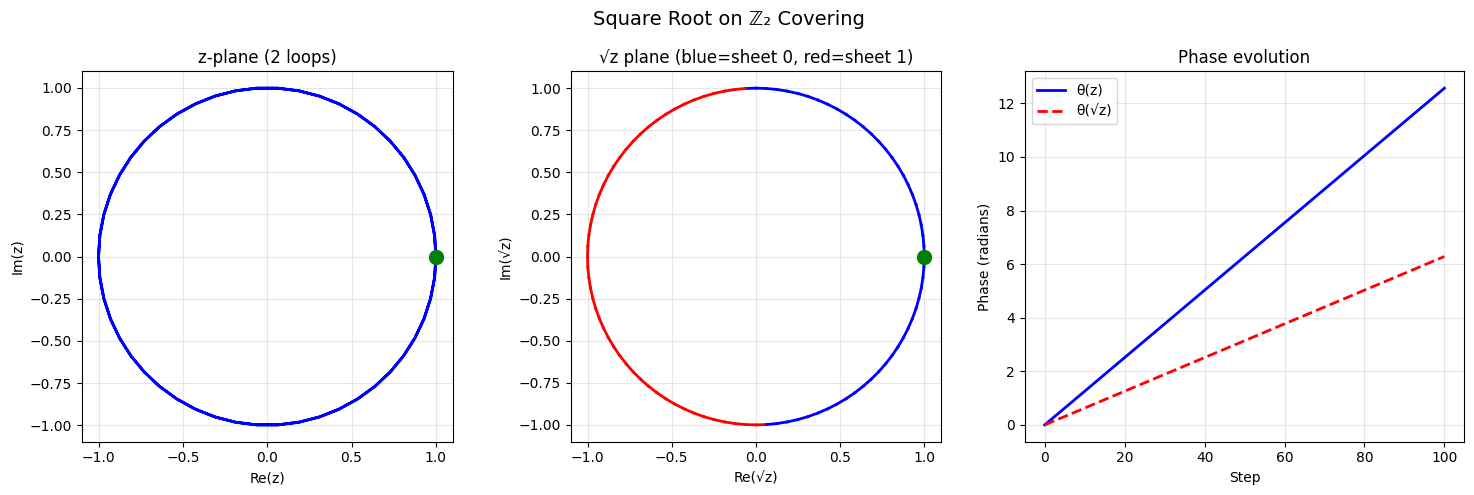

In [16]:
# Plot sqrt on both sheets (2 loops to show full cycle)
fig, axes = plot_sqrt_branches(r=1.0, n_points=100, config=cfg)
plt.tight_layout()
plt.show()

**Notice:**
- The input z traces a closed circle (returns to start)
- But √z does NOT close! It ends at the opposite point
- Blue = sheet+ (parity 0), Red = sheet− (parity 1)
- The path swaps sheets when crossing the branch cut

## 5. Two Loops: Return to Original Sheet

After TWO loops around the origin, we return to the starting sheet!

=== Two Loops ===

Initial: w=0, b=0
After 1 loop: w=1, b=1
After 2 loops: w=2, b=0


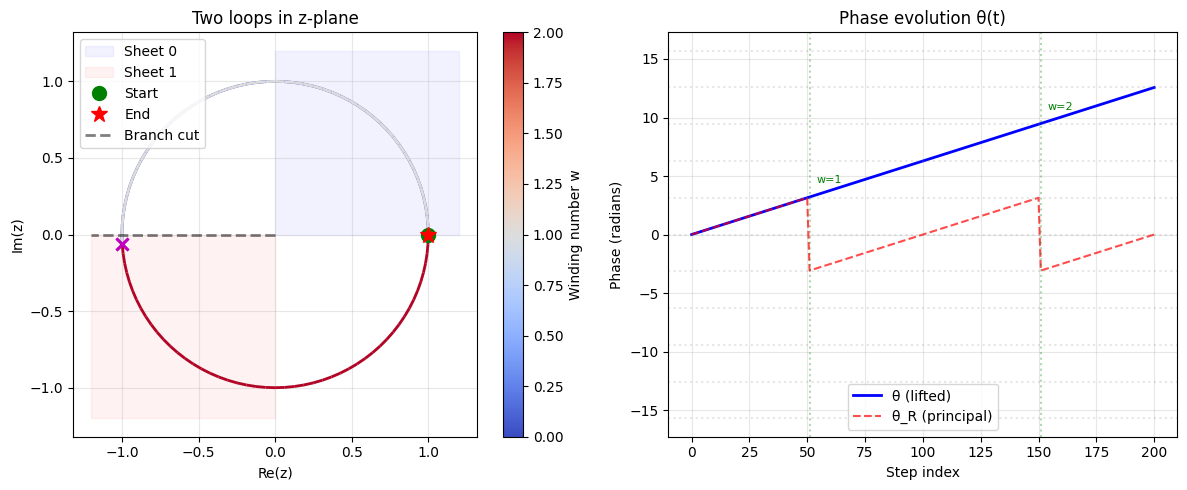

In [17]:
# Two loops around the origin
z_path_2 = circular_path(center=0, radius=1.0, n_loops=2, n_points=200)
states_2 = pr_unwrap_path(z_path_2, config=cfg)

print("=== Two Loops ===\n")
print(f"Initial: w={states_2[0].w}, b={states_2[0].b}")
print(f"After 1 loop: w={states_2[100].w}, b={states_2[100].b}")
print(f"After 2 loops: w={states_2[-1].w}, b={states_2[-1].b}")

# Show the path and phase evolution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
plot_riemann_surface(states_2, ax=ax1, title='Two loops in z-plane')
plot_theta_evolution(states_2, ax=ax2, title='Phase evolution θ(t)')
plt.tight_layout()
plt.show()

After 2 loops: w=2, b=0. The parity is back to 0, so √z returns to its original value!

This is the **ℤ₂** structure: the square root has a **2-fold** covering, so you need **2** loops to get back.

## 6. A Path That Doesn't Enclose the Origin

If a path doesn't go around the origin, no winding accumulates.

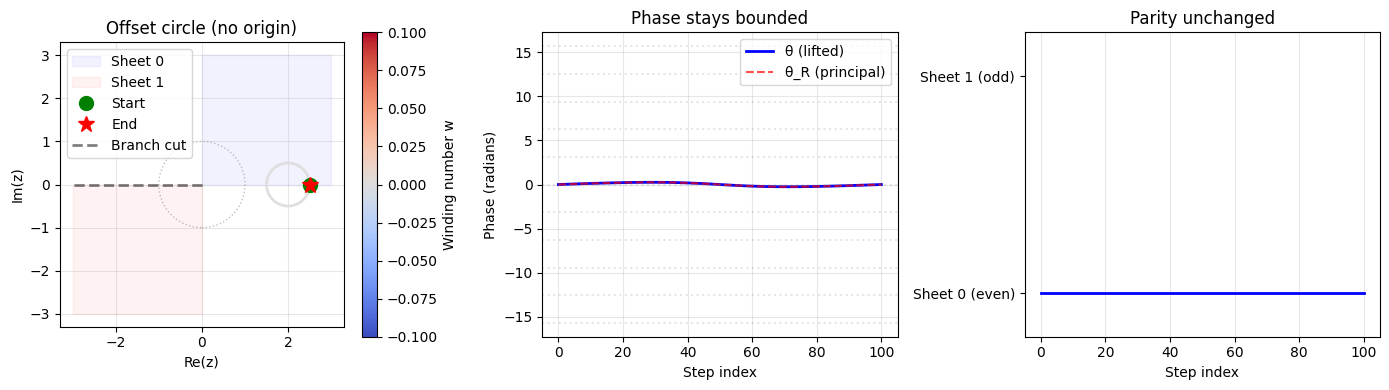


Final winding: 0
Final parity: 0
No winding because we didn't go around the origin!


In [18]:
# Circle NOT around origin (offset to the right)
z_path_offset = circular_path(center=2+0j, radius=0.5, n_loops=1, n_points=100)
states_offset = pr_unwrap_path(z_path_offset, config=cfg)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
plot_riemann_surface(states_offset, ax=ax1, title='Offset circle (no origin)')
plot_theta_evolution(states_offset, ax=ax2, title='Phase stays bounded')
plot_parity_timeline(states_offset, ax=ax3, title='Parity unchanged')
plt.tight_layout()
plt.show()

print(f"\nFinal winding: {states_offset[-1].w}")
print(f"Final parity: {states_offset[-1].b}")
print("No winding because we didn't go around the origin!")

## 7. Spiral Path: Winding Accumulates Gradually

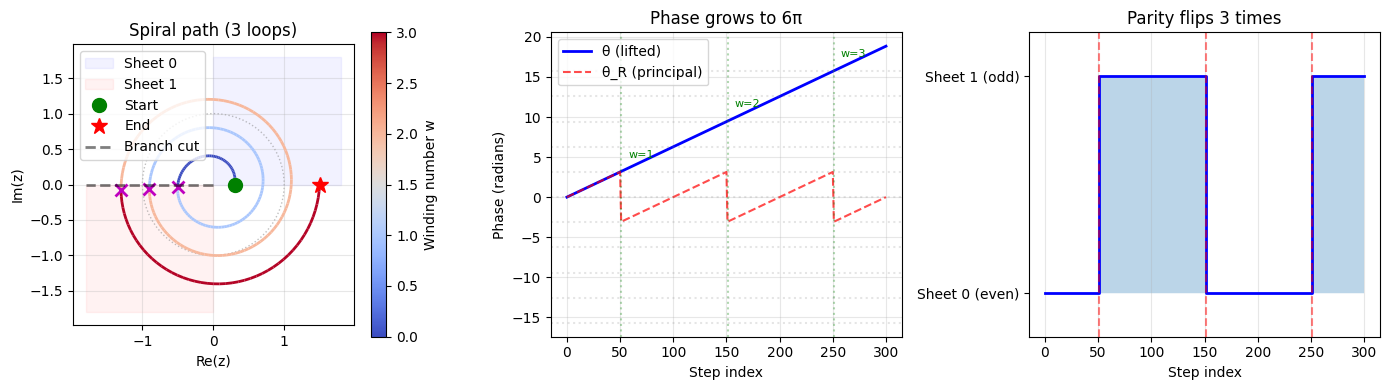


3-loop spiral: w=3, b=1


In [19]:
# Spiral path: 3 loops while radius grows
z_spiral = spiral_path(center=0, r_start=0.3, r_end=1.5, n_loops=3, n_points=300)
states_spiral = pr_unwrap_path(z_spiral, config=cfg)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
plot_riemann_surface(states_spiral, ax=ax1, title='Spiral path (3 loops)')
plot_theta_evolution(states_spiral, ax=ax2, title='Phase grows to 6π')
plot_parity_timeline(states_spiral, ax=ax3, title='Parity flips 3 times')
plt.tight_layout()
plt.show()

print(f"\n3-loop spiral: w={states_spiral[-1].w}, b={states_spiral[-1].b}")

## 8. Summary: The PR-Root State Machine

PR-Root tracks the state vector **S = (A, θ, w, b)**:

| Component | Meaning |
|-----------|---------|
| A | Amplitude \|z\| |
| θ | Lifted phase (continuous, unbounded) |
| w | Winding number = round((θ - θ_R) / 2π) |
| b | Branch parity = w mod 2 |

The key insight: **b** is the ℤ₂ holonomy that determines which sheet of √z you're on!

In [20]:
# Final demonstration: compare standard vs PR-Root
print("=== Standard Python vs PR-Root ===\n")

# Standard: no history
z = -1 + 0j
print(f"Standard √(-1) = {z**0.5}")
print(f"Standard √(-1) = {z**0.5}  (always the same)\n")

# PR-Root: history-dependent
state_direct = PRState.from_complex(-1, config=cfg)
sqrt_direct, _ = pr_sqrt(state_direct)
print(f"PR-Root √(-1) [direct] = {sqrt_direct.z:.4f}")

# Approach -1 via the upper half-plane
t = np.linspace(0, np.pi, 50)
path_upper = np.exp(1j * t)  # 1 → i → -1
states_upper = pr_unwrap_path(path_upper, config=cfg)
sqrt_upper, _ = pr_sqrt(states_upper[-1])
print(f"PR-Root √(-1) [via upper] = {sqrt_upper.z:.4f}")

# Approach -1 via the lower half-plane  
t = np.linspace(0, -np.pi, 50)
path_lower = np.exp(1j * t)  # 1 → -i → -1
states_lower = pr_unwrap_path(path_lower, config=cfg)
sqrt_lower, _ = pr_sqrt(states_lower[-1])
print(f"PR-Root √(-1) [via lower] = {sqrt_lower.z:.4f}")

print("\nPR-Root gives DIFFERENT answers based on the path taken!")

=== Standard Python vs PR-Root ===

Standard √(-1) = (6.123233995736766e-17+1j)
Standard √(-1) = (6.123233995736766e-17+1j)  (always the same)

PR-Root √(-1) [direct] = 0.0000+1.0000j
PR-Root √(-1) [via upper] = 0.0000+1.0000j
PR-Root √(-1) [via lower] = 0.0000-1.0000j

PR-Root gives DIFFERENT answers based on the path taken!
